Dataset created successfully. It shows a non-linear relationship.
Sample data point 0: (X=0.09, y=0.78)
Sample data point 1: (X=0.10, y=0.33)
Sample data point 2: (X=0.20, y=1.46)
Sample data point 3: (X=0.30, y=1.35)
Sample data point 4: (X=0.36, y=0.82)

Data split: 56 training samples, 24 testing samples.
K-Nearest Neighbors model training complete.

Predictions made successfully.

Actual: 1.65, Predicted: 1.68
Actual: 0.78, Predicted: 1.27
Actual: 2.95, Predicted: 2.35
Actual: 1.76, Predicted: 1.33
Actual: 1.64, Predicted: 2.15

Model Evaluation:
Mean Squared Error (MSE): 0.26
R² Score: 0.91


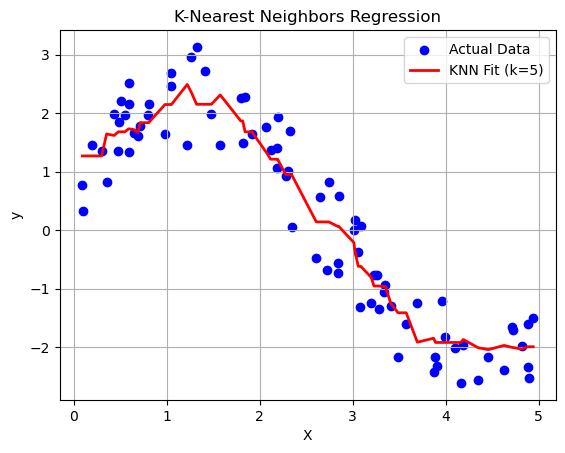


Visualization complete. The plot shows the original data and the prediction curve from the KNN model.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create a simulated non-linear dataset
np.random.seed(0)

X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() * 2 + np.cos(X).ravel() + np.random.randn(80) * 0.5

print("Dataset created successfully. It shows a non-linear relationship.")

for i in range(5):
    print(f"Sample data point {i}: (X={X[i][0]:.2f}, y={y[i]:.2f})")

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nData split: {len(X_train)} training samples, {len(X_test)} testing samples.")

# 3. Train the K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

print("K-Nearest Neighbors model training complete.\n")

# 4. Make predictions on the testing data
y_pred = knn_model.predict(X_test)

print("Predictions made successfully.\n")

for i in range(min(5, len(y_test))):
    print(f"Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}")

# 5. Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 6. Visualize the results
# Sort for a smooth curve
X_sorted = np.sort(X.flatten())
X_sorted = X_sorted.reshape(-1, 1)

# Predict across the full sorted range
y_pred_curve = knn_model.predict(X_sorted)

# Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_sorted, y_pred_curve, color='red', linewidth=2, label='KNN Fit (k=5)')
plt.title('K-Nearest Neighbors Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("\nVisualization complete. The plot shows the original data and the prediction curve from the KNN model.")